In [113]:
# Imports mnist dataset
from keras.datasets import mnist

# calls load command
(X, y), (X_test, y_test) = mnist.load_data()

# prints shape
print('Train: X=%s, y=%s' % (X.shape, y.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


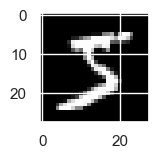

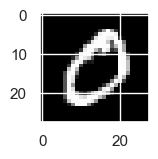

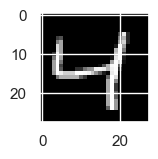

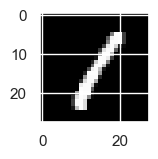

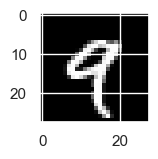

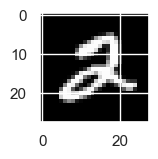

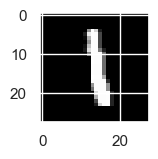

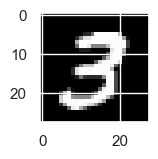

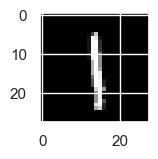

In [114]:
# imports matplotlib
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [115]:
# Imports libraries and packages
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
sns.set_theme()

# Scikit-Learn tools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

# ML Models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Dictionary that will hold the accuracy values 
dict_acc = {}

#Reshapes data
X = X.reshape(60000,784)
X_test = X_test.reshape(10000,784)

# Create train and validation data
(X_train, X_validation, y_train, y_validation) = train_test_split(X, y, random_state=0)

print(X_train.shape, X_validation.shape)


(45000, 784) (15000, 784)


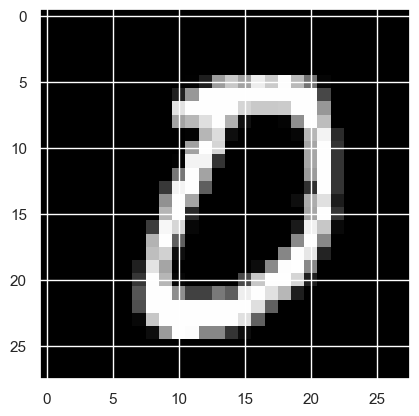

In [116]:
plt.imshow(X_train[5000].reshape(28,28), cmap='gray')

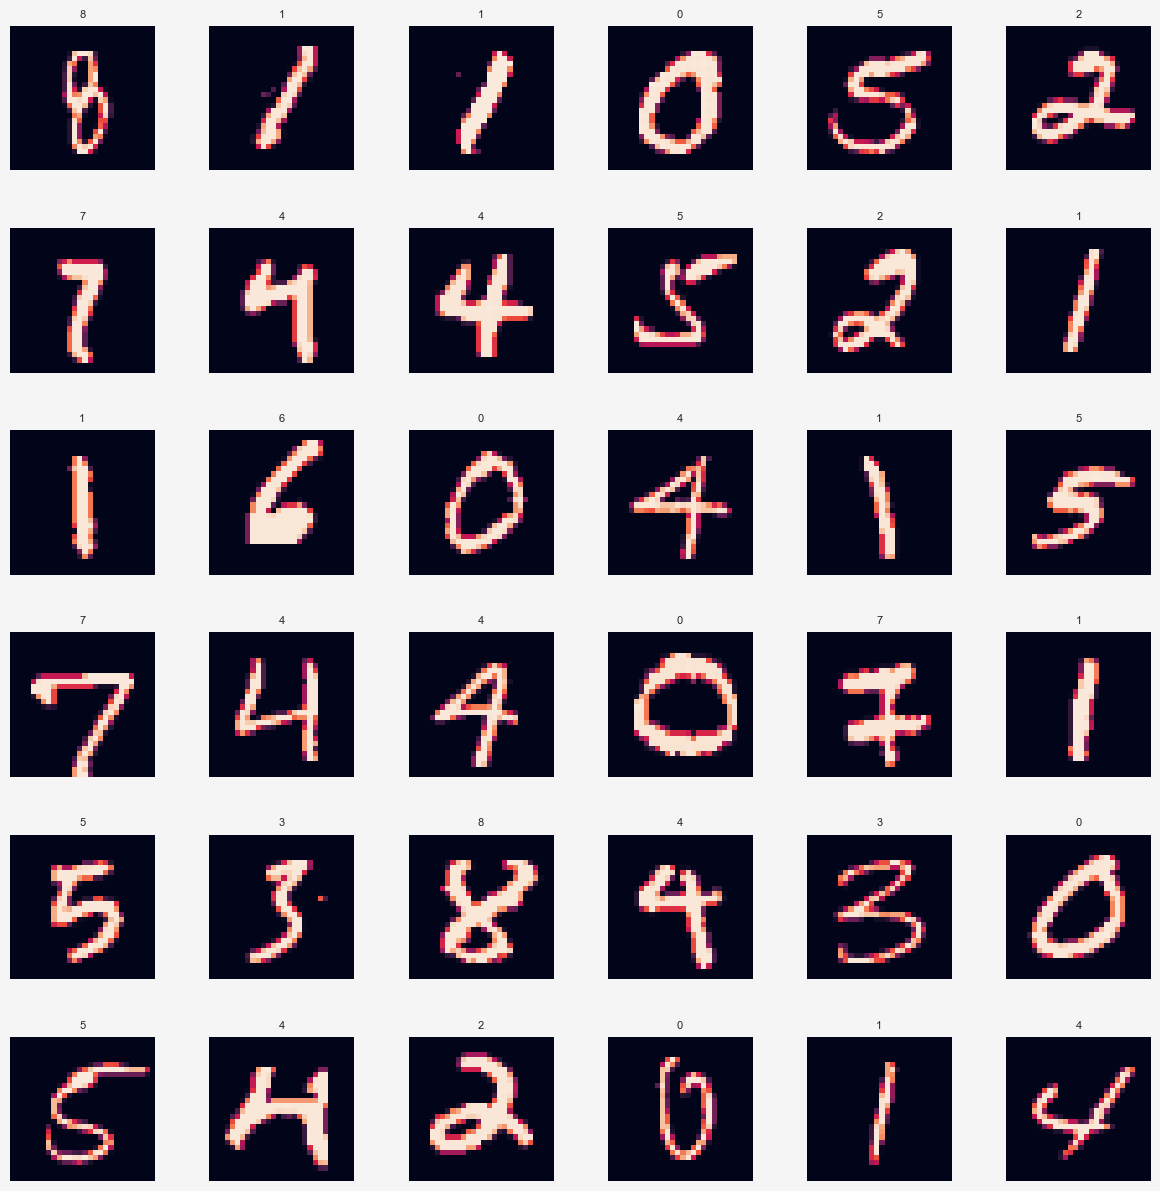

In [117]:
W_grid = 6
L_grid = 6

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

fig.patch.set_facecolor('whitesmoke')

axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index].reshape(28,28))
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [118]:
# As their are multiple models I want to test, I will shorten the data to speed up training

X_train = X_train[:6000] # 6000 images
y_train = y_train[:6000]
X_validation = X_validation[:2000] # 2000 images
y_validation = y_validation[:2000]

print("Shapes Current")
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

Shapes Current
(6000, 784)
(6000,)
(2000, 784)
(2000,)


# Models

### Support Vector Classifier

I will also use this step to compare accuracy metrics

In [119]:
from sklearn.metrics import recall_score, precision_score, f1_score, balanced_accuracy_score

In [120]:
# Create/Fit model
svc_model = SVC(decision_function_shape='ovo', cache_size=4000)
svc_model.fit(X_train, y_train)

# to store predictions
predict_svc = svc_model.predict(X_validation)

# Metrics to test
recall_svc = recall_score(y_validation, predict_svc, average='macro')
f1_svc = f1_score(y_validation, predict_svc, average='macro')
precision_svc = precision_score(y_validation, predict_svc, average='macro')
bal_acc_svc = balanced_accuracy_score(y_validation, predict_svc)
acc_svc = accuracy_score(y_validation, predict_svc)

# Stores accuracy
dict_acc['SVC'] = acc_svc


print('Recall Score:', recall_svc)
print('F1 Score:', f1_svc)
print('Precision Score:', precision_svc)
print('Accuracy Score:', acc_svc)
print('Balanced Accuracy Score:', bal_acc_svc)

Recall Score: 0.9564624664444248
F1 Score: 0.9558506208397015
Precision Score: 0.9559020725333032
Accuracy Score: 0.957
Balanced Accuracy Score: 0.9564624664444248


We can see from the above results that the scores vary by only 0.0012 or 0.12% (Accuracy Score - F1 Score), so moving forward we will be using Accuracy Score for the following models

### K-Neighbors Classifier

In [121]:
# Create/Fit model
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

# Predicitions
predict_kn = kn.predict(X_validation)
acc_kn = accuracy_score(y_validation, predict_kn)

# Stores score 
dict_acc['KN'] = acc_kn
print('KNeighbors Accuracy Score: ', acc_kn)

KNeighbors Accuracy Score:  0.94


### Logistic Regression

In [122]:
# Create/Fit model
lreg = LogisticRegression(max_iter=2000)
lreg.fit(X_train, y_train)

# Predicitions
predicts_lreg = lreg.predict(X_validation)
acc_lreg = accuracy_score(y_validation, predicts_lreg)

# Stores score
dict_acc['Logistic Regression'] = acc_lreg
print('Logistic Regression Accuracy Score: ', acc_lreg)

Logistic Regression Accuracy Score:  0.866


c:\Users\U360269\AppData\Local\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Ridge Classifier

In [123]:
# Create/Fit model
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

# Predicitions
predicts_ridge = ridge.predict(X_validation)
acc_ridge = accuracy_score(y_validation, predicts_ridge)

# Stores score
dict_acc['Ridge Classifier'] = acc_ridge
print('Ridge Classifier Accuracy Score: ', acc_ridge)

Ridge Classifier Accuracy Score:  0.842


### Ridge Classifier CV

In [124]:
# Create/Fit model
ridgeCV = RidgeClassifierCV()
ridgeCV.fit(X_train, y_train)

# Predicitions
predicts_ridgeCV = ridgeCV.predict(X_validation)
acc_ridgeCV = accuracy_score(y_validation, predicts_ridgeCV)

# Stores score
dict_acc['Ridge Classifier CV'] = acc_ridgeCV
print('Ridge Classifier CV Accuracy Score: ', acc_ridgeCV)

Ridge Classifier CV Accuracy Score:  0.843


### MLP Classifier

In [125]:
# Create/Fit model
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

# Predictions
predict_mlp = mlp.predict(X_validation)
acc_mlp = accuracy_score(y_validation, predict_mlp)

# Store Score
dict_acc['MLP Classifier'] = acc_mlp
print('MLP Classifier Accuracy Score: ', acc_mlp)

MLP Classifier Accuracy Score:  0.9015


### Naive Bayes - Gaussian

In [126]:
# Create/Fit model
nbg = GaussianNB()
nbg.fit(X_train, y_train)

# Predictions
predict_nbg = nbg.predict(X_validation)
acc_nbg = accuracy_score(y_validation, predict_nbg)

# Store Score
dict_acc['Naive Bayes - Gaussian'] = acc_nbg
print('Naive Bayes Gaussian Accuracy Score: ', acc_nbg)

Naive Bayes Gaussian Accuracy Score:  0.5565


### Decision Tree

In [127]:
# Create/Fit model
dTree = DecisionTreeClassifier()
dTree.fit(X_train, y_train)

# Predictions
predict_dTree = dTree.predict(X_validation)
acc_dTree = accuracy_score(y_validation, predict_dTree)

# Store Score
dict_acc['Decision Tree'] = acc_dTree
print('Decision Tree Accuracy Score: ', acc_dTree)

Decision Tree Accuracy Score:  0.791


### Random Forest

In [128]:
# Create/Fit model
rForest = RandomForestClassifier()
rForest.fit(X_train, y_train)

# Predictions
predict_rForest = rForest.predict(X_validation)
acc_rForest = accuracy_score(y_validation, predict_rForest)

# Store Score
dict_acc['Random Forest'] = acc_rForest
print('Random Forest Accuracy Score: ', acc_rForest)

Random Forest Accuracy Score:  0.948


### Gradient Boosting Classifier

In [129]:
# Create/Fit model
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Predictions
predict_gbc = gbc.predict(X_validation)
acc_gbc = accuracy_score(y_validation, predict_gbc)

# Store Score
dict_acc['Gradient Boosting Classifier'] = acc_gbc
print('Gradient Boosting Classifier Accuracy Score: ', acc_gbc)

Gradient Boosting Classifier Accuracy Score:  0.9235


# Plotting our Results

This next step we will plot our results to compare the accuracy scores achieved by each model

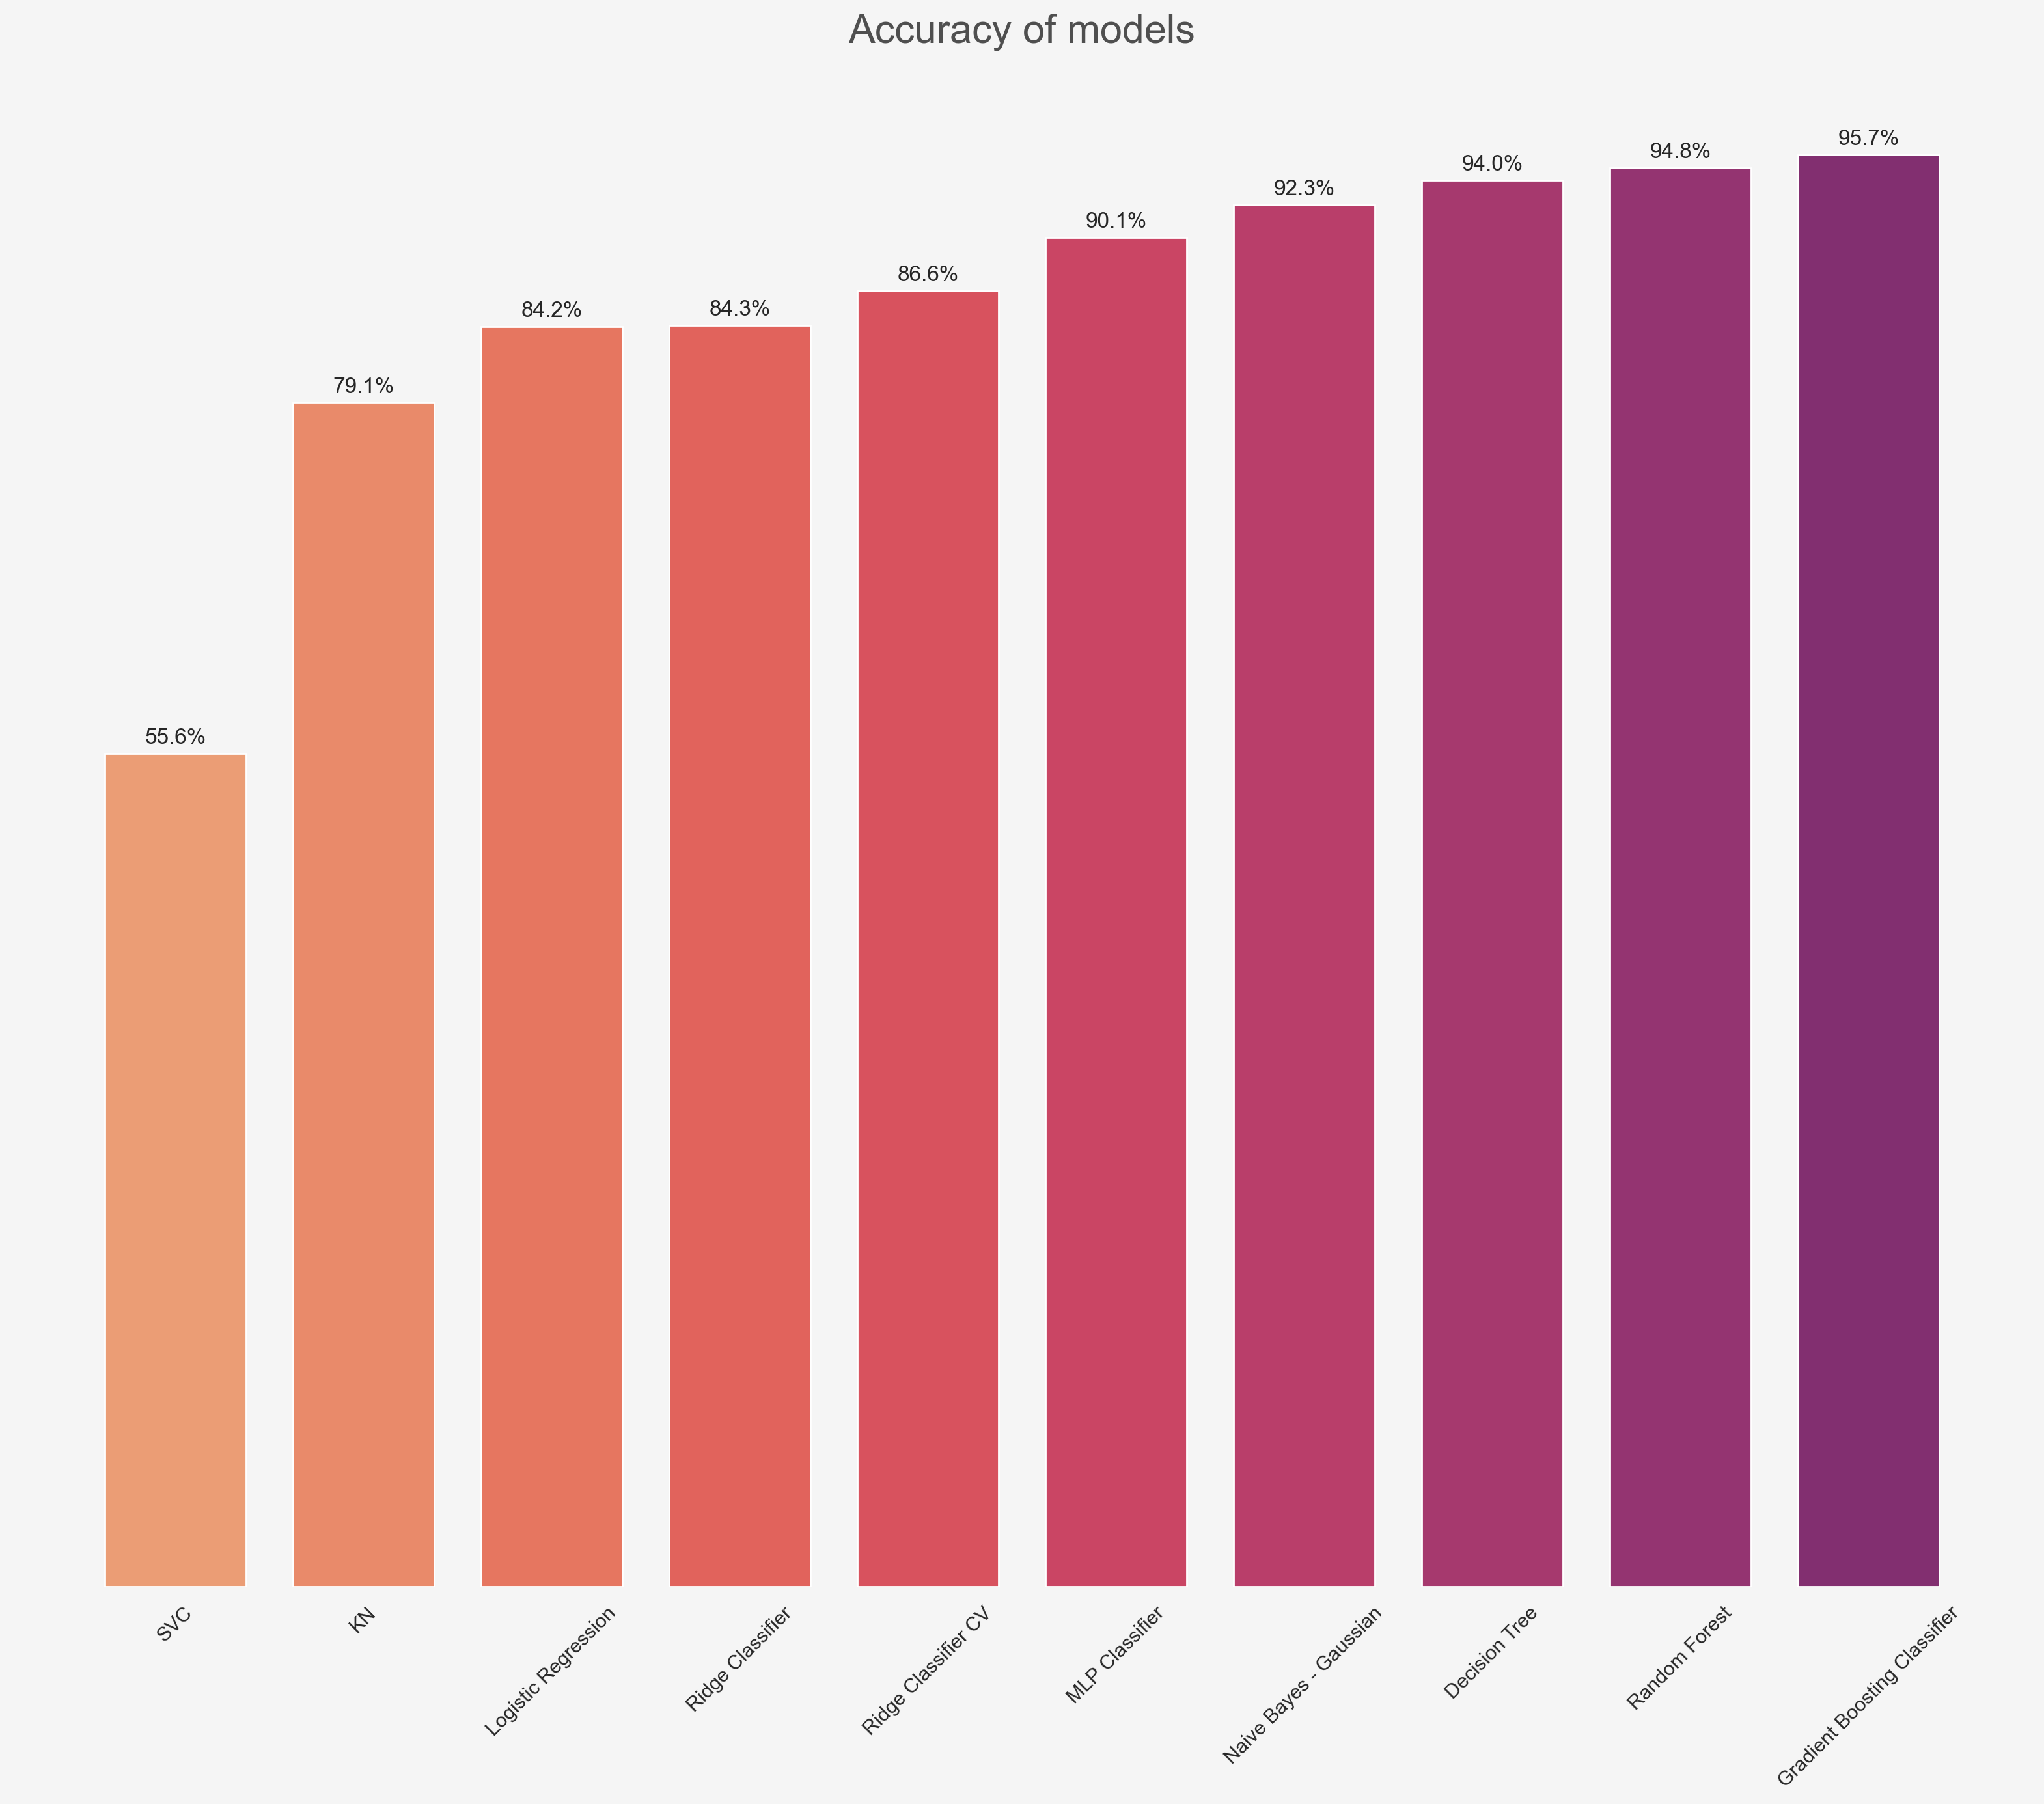

In [130]:
fig = plt.figure(figsize=(20,15), dpi = 200, facecolor="whitesmoke") # Changes Size
ax = plt.subplot(111, facecolor="whitesmoke") # Changes background color

# Sorts dict_acc into sorted list, then converts back to dictionary
sorted_dict_acc = sorted(dict_acc.items(), key=lambda x:x[1]) 
sorted_dict_acc = dict(sorted_dict_acc)

# Bar plot characteristics and color palette
ax.bar(
    range(len(sorted_dict_acc)),
    list(sorted_dict_acc.values()),
    color = sns.color_palette("flare", n_colors=12),
    width = 0.75,
)

# For loop adds percent labels to top of bars
for x1 in ax.patches:
    h1 = x1.get_height()
    
    percents = h1*100

    ax.annotate(
        '{:.1f}%'.format(percents),
        xy=(x1.get_x() + x1.get_width() /2, h1),
        xytext=(0,3),
        textcoords="offset points",
        ha='center',
        va= 'bottom'
    )

plt.grid(False) # Turns off gird
plt.box(False) # Turns off box
plt.xticks(range(len(dict_acc)), list(dict_acc.keys()), rotation =45) # Rotates x label
plt.yticks([]) # Removes y ticks as label are on top of bars

plt.title('Accuracy of models', size=22, alpha=0.8, y=1.02) # Title

plt.savefig("Accuracy of models.png", bbox_inches='tight', dpi=300) # Saves png file of bar plot

plt.show() # Displays bar plot

# displays sorted_dict_acc uncomment to use
#sorted_dict_acc